## Reto 1: Coeficiente de correlación de Pearson

### 1. Objetivos:
    - Practicar la interpretación de gráficas de dispersión
 
---
    
### 2. Desarrollo:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### a) Practicando la interpretación de gráficas

A continuación te presentamos varias gráficas hechas con algunos de los datasets de este módulo. El Reto es interpretar las gráficas con las herramientas que tenemos hasta el momento. Haz lo siguiente:

1. Cambia las rutas de cada dataset para que `pandas` pueda leerlas desde el Drive.
2. Corre el Notebook para producir las gráficas que han sido predefinidas.
3. Viendo las gráficas solamente, sin realizar ningún cálculo de correlación, intenta discernir:

  a) Si hay una correlación entre ambas variables
  
  b) Si sí hay, ¿qué dirección tiene? (positiva o negativa)
  
  c) Si sí hay, ¿qué fuerza tiene? (valor de -1 a 1)
  
Recuerda que el coeficiente de correlación es muy sensible a valores atípicos. Por lo tanto, no olvides tomar en cuenta eso.
  
4. Después, usa el método `corr` para comprobar tus hipótesis.
5. Sabiendo la naturaleza de su correlación (o su inexistencia), comparte con tus compañeros y la experta por qué crees que existe o no esa relación. ¿Hubieras pensado de antemano que esas variables estaban correlacionadas (o no)? ¿Qué información obtenemos a partir de estos análisis?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!pwd

/content


In [6]:
ruta_1 = '/content/drive/MyDrive/BEDU/Remoto Datasets/Remoto near_earth_objects-jan_feb_1995-clean.csv'
ruta_2 = '/content/drive/MyDrive/BEDU/Remoto Datasets/Remoto athlete_olympic_events-clean-no_repetition.csv'
ruta_3 = '/content/drive/MyDrive/BEDU/Remoto Datasets/Remoto videogame_sales-raw.csv'
vino = '/content/drive/MyDrive/BEDU/Remoto Datasets/Remoto wine_quality_red-clean.csv'

### a) Ruta 1: Near Earth Objects

El dataset 'near_earth_objects-jan_feb_1995-clean.csv' contiene datos acerca de objetos espaciales que orbitan cerca de la Tierra. Vamos a explorar las relaciones entre los tamaños y las velocidades de estos objetos.

In [5]:
df_1 = pd.read_csv(ruta_1, index_col=0)

df_1.head()

,id,name,is_potentially_hazardous_asteroid,estimated_diameter.meters.estimated_diameter_min,estimated_diameter.meters.estimated_diameter_max,close_approach_date,epoch_date_close_approach,orbiting_body,relative_velocity.kilometers_per_second,relative_velocity.kilometers_per_hour
0,2154652,154652 (2004 EP20),False,483.676488,1081.533507,1995-01-07,789467580000,Earth,16.142864,58114.308667
1,3153509,(2003 HM),True,96.506147,215.794305,1995-01-07,789491340000,Earth,12.351044,44463.757734
2,3516633,(2010 HA),False,44.111820,98.637028,1995-01-07,789446820000,Earth,6.220435,22393.567277
3,3837644,(2019 AY3),False,46.190746,103.285648,1995-01-07,789513900000,Earth,22.478615,80923.015021
4,3843493,(2019 PY),False,22.108281,49.435619,1995-01-07,789446700000,Earth,4.998691,17995.288355


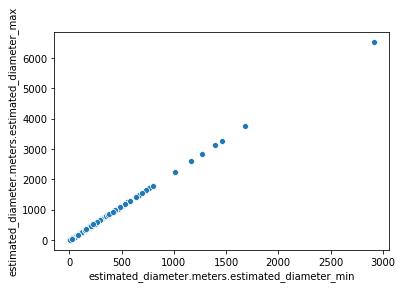

In [ ]:
sns.scatterplot(df_1['estimated_diameter.meters.estimated_diameter_min'], df_1['estimated_diameter.meters.estimated_diameter_max']);

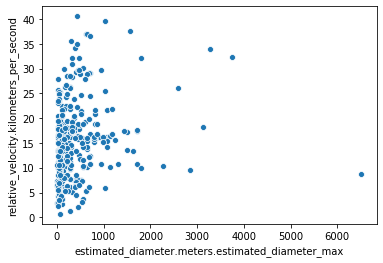

In [ ]:
sns.scatterplot(df_1['estimated_diameter.meters.estimated_diameter_max'], df_1['relative_velocity.kilometers_per_second']);

### b) Ruta 2: Athlete Olympic Events

Este dataset contiene datos sobre eventos Olímpicos. La fuente original tiene información sobre el atleta que participó, las fechas y premios. Esta versión del dataset incluye solamente datos sobre la edad, peso y altura de los atletas. Comparemos edades, pesos y alturas.

Debido al elevado número de muestras en este dataset, utilizar gráficas de dispersión convencionales no resulta muy efectivo. Por esta razón, estas relaciones están hechas con una gráfica llamada *binning hexagonal*. Lo que hacen los binnings hexagonales es dividir todo el plano en pequeños hexágonos. Cada hexágono representa un rango de valores de `x` y `y`. Después, se cuenta el número de muestras que hay sobre cada hexágono y eso se asigna como la 'densidad' del hexágono. Cada hexágono se colorea dependiendo de la densidad: entre más obscuro, más puntos cayeron sobre ese hexágono.

In [ ]:
df_2 = pd.read_csv(ruta_2, index_col=0)

df_2.head()

,age,height,weight,sex
athlete_id,,,,
1,24.000000,180.0,80.0,M
2,23.000000,170.0,60.0,M
5,24.333333,185.0,82.0,F
6,32.000000,188.0,75.0,M
7,32.000000,183.0,72.0,M


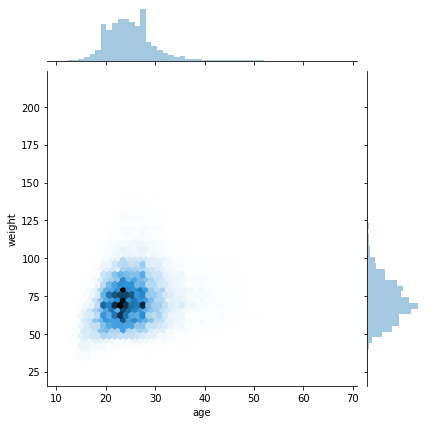

In [ ]:
sns.jointplot(df_2['age'], df_2['weight'], kind='hex');

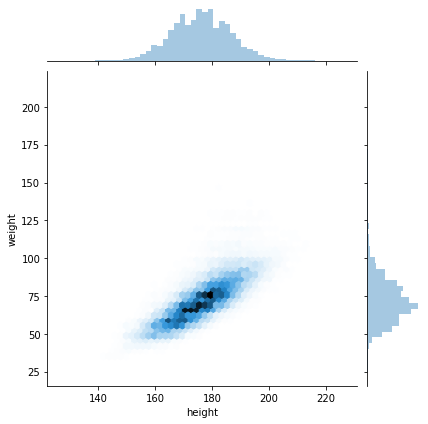

In [ ]:
sns.jointplot(df_2['height'], df_2['weight'], kind='hex');

### c) Ruta 4: Ventas de videojuegos a través del mundo.

Este dataset contiene datos sobre ventas de videojuegos en todo el mundo. Vamos a ver las relaciones que existen entre las ventas en diferentes lugares del mundo.

In [ ]:
df_4 = pd.read_csv(ruta_3)

df_4.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
df_4 = df_4[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]

In [ ]:
df_4 = df_4[df_4 > 0]
df_4 = df_4[df_4['NA_Sales'] < 20]
df_4 = df_4[df_4['JP_Sales'] < 10]

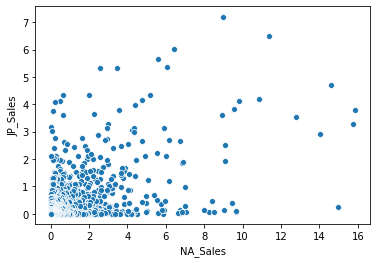

In [ ]:
sns.scatterplot(df_4['NA_Sales'], df_4['JP_Sales']);

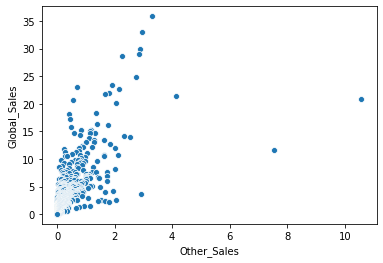

In [ ]:
sns.scatterplot(df_4['Other_Sales'], df_4['Global_Sales']);

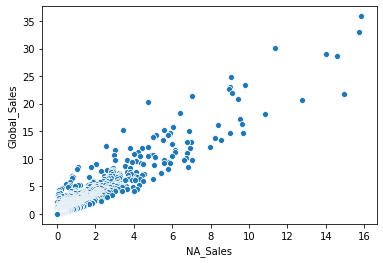

In [ ]:
sns.scatterplot(df_4['NA_Sales'], df_4['Global_Sales']);

In [9]:
df_vino = pd.read_csv(vino, index_col=0)
df_vino.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
df_vino.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


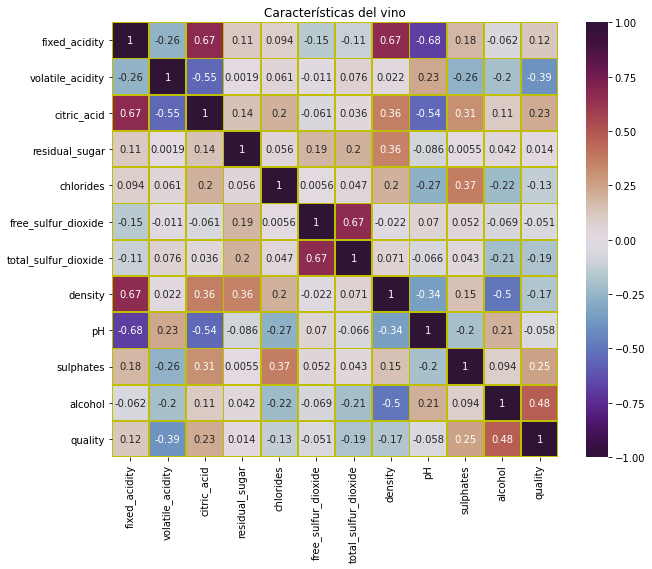

In [24]:
plt.figure(figsize=(10, 8))
ax = sns.heatmap(df_vino.corr(), vmin=-1, vmax=1, annot=True, cmap="twilight_shifted", 
                 linewidths=.8, cbar=True, linecolor='y')
ax.set(title="Características del vino");

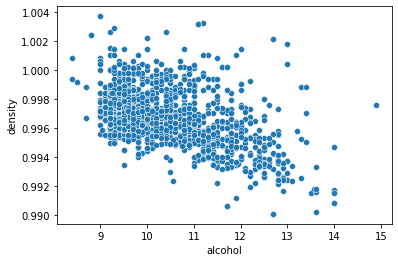

In [27]:
sns.scatterplot(x=df_vino["alcohol"], y=df_vino["density"])